# OPEN AI 🧠

In [ ]:
# Creación de API KEY

"""https://platform.openai.com/"""

# Pulsamos en Quickstart --> Create an API Key --> Create new secret key

# Hay tokens gratuitos para probar, pero parece ser que es de pago

'https://platform.openai.com/'

In [ ]:
# Importanción de librerías (hacer pip install correspondiente)

# Hacer las instalaciones que necesitéis:
#pip install pandas
#pip install openai
#pip install python-dotenv
#pip install matplotlib

import pandas as pd
from openai import OpenAI
import ast
from dotenv import load_dotenv
import os
import json
import matplotlib.pyplot as plt

## Ejemplo categorización de sectores laborales

In [ ]:
wt=pd.read_csv("sectores.csv") #Cargamos el csv de sectores

# csv ficticio

In [ ]:
wt.head() #Visualizamos las 5 primeras líneas del df

,id,sector
0,1,Marketing
1,2,Biología conservación
2,3,Administrativo
3,4,Seguridad privada
4,5,Educación canina


In [ ]:
# Sectores que teníamos antes

wt["sector"].unique()

#.unique(), es una función de pandas, te devuelve una lista de todos los valores únicos
# que existen en esa columna.

array(['Marketing', 'Biología conservación', 'Administrativo',
       'Seguridad privada', 'Educación canina', 'Atención al cliente',
       'Retail', 'Abogada', 'Tercer Sector', 'Recursos humanos',
       'Matemáticas', 'Biología', 'Cocinera', 'Tienda de ropa',
       'Hosteleria', 'Administración y finanzas',
       'Ingeniería y Comercial', 'Jurídico', 'Ingeniería civil',
       'Sanidad', 'Panadería', 'Marketing digital',
       'Hice ciencias ambientales', 'Docente', 'Enfermera', 'Tecnologico',
       'Recursos humanos y traducción', 'Profesora de Ed Física',
       'Diseño', 'Comercio', 'Tatuadora', 'Limpiadora', 'Alimentos',
       'Gran consumo', 'atencion al cliente y turismo', 'administración',
       'Investigación social', 'Trabajo social', 'Call center', 'Banca',
       'Comunicación', 'Industria Fast Fashion', 'Telecomunicaciones',
       'Eventos', 'Ventas', 'Ingeniería Electrónica', 'Bancario',
       'Academia', 'Conductora', 'Tercer sector', 'AUTOMOVILÍSTICO',
       

In [ ]:
# Vamos a crear una lista de categorías llamada categorías

categorias = ['Marketing y Comunicación',
 'Educación y Docencia',
 'Ciencias y Salud',
 'Administración y Finanzas',
 'Tecnología e Ingeniería',
 'Comercio y Retail',
 'Hostelería y Turismo',
 'Servicios y Tercer Sector',
 'Legal y Seguridad',
 'Otros / No aplica']

lista_trabajos = wt["sector"].tolist() # Convertimos en lista la columna sector del csv

In [ ]:
print(lista_trabajos)

['Marketing', 'Biología conservación', 'Administrativo', 'Seguridad privada', 'Educación canina', 'Atención al cliente', 'Retail', 'Abogada', 'Tercer Sector', 'Recursos humanos', 'Matemáticas', 'Biología', 'Cocinera', 'Tienda de ropa', 'Hosteleria', 'Administración y finanzas', 'Ingeniería y Comercial', 'Atención al cliente', 'Jurídico', 'Ingeniería civil', 'Sanidad', 'Panadería', 'Marketing digital', 'Hice ciencias ambientales', 'Docente', 'Enfermera', 'Tecnologico', 'Recursos humanos y traducción', 'Profesora de Ed Física', 'Diseño', 'Comercio', 'Tatuadora', 'Limpiadora', 'Alimentos', 'Marketing', 'Gran consumo', 'atencion al cliente y turismo', 'administración', 'Investigación social', 'Trabajo social', 'Call center', 'Banca', 'Comunicación', 'Industria Fast Fashion', 'Telecomunicaciones', 'Eventos', 'Ventas', 'Ingeniería Electrónica', 'Bancario', 'Academia', 'Conductora', 'Tercer sector', 'AUTOMOVILÍSTICO', 'Tech', 'Turismo', 'Sector Textil/Moda', 'Educación', 'Industria', 'urbanis

In [ ]:
# ------- PARTE DE CARGA DE API E "INICIAR SESIÓN" ------

# 1️⃣ OPCIONAL PERO RECOMENDABLE: Cargar tu archivo private.env, simplemente por seguridad
load_dotenv("private.env")  # Este es un archivo dónde tengo almacenada mi OPEN_API_KEY, meter vuestra API_KEY

# 2️⃣ Obtener la variable de entorno y verificar
mi_api_key = os.getenv("OPENAI_API_KEY") # Creo la variable y me traigo mi API_KEY
if not mi_api_key:
    raise ValueError("Error: OPENAI_API_KEY no se encontró. Revisa el archivo 'private.env'.")

# 3️⃣ Inicializar el cliente usando OPENAI
client = OpenAI(api_key=mi_api_key)

# ----FUNCIONA PASÁNDOLE UN PROMPT DE LO QUE QUEREMOS QUE HAGA ----

# 4️⃣ Prompt y Definición de Mensajes para Chat
prompt = f"""
Clasifica los siguientes trabajos en una de las categorías: {categorias}.
Devuelve un formato JSON con la siguiente estructura--> "trabajo": "categoría".

Lista de trabajos:
{lista_trabajos} 
"""

# 5️⃣ Llamada a la API 
# Con la función create
try:
    respuesta = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[{"role": "user", "content": prompt}],
        response_format={"type": "json_object"} 
    )
    texto_ia = respuesta.choices[0].message.content # Extrae el mensaje

    """respuesta.choices-->Busca la lista de "opciones de respuesta" que te dio la IA.

        [0]-->Toma la primera opción (la única que nos interesa).

        .message.content-->Extrae el contenido del mensaje, que es tu texto JSON clasificado."""
    
except Exception as e:
    print(f"🚨 Error grave en la llamada a la API: {e}")
    texto_ia = "{}" 

# 5️⃣ Convertir respuesta en diccionario de Python
try:
    resultados_dict = json.loads(texto_ia)
except Exception as e:
    print(f"⚠️ Error al convertir la respuesta JSON: {e}")
    resultados_dict = {}

# 6️⃣ Crear nueva columna con la clasificación
wt["Sector_IA"] = wt["sector"].map(resultados_dict)

# 7️⃣ Mostrar resultados
print(wt[["sector", "Sector_IA"]].head())


                  sector                  Sector_IA
0              Marketing   Marketing y Comunicación
1  Biología conservación           Ciencias y Salud
2         Administrativo  Administración y Finanzas
3      Seguridad privada          Legal y Seguridad
4       Educación canina       Educación y Docencia


In [ ]:
"""Lo que se consigue es que de una columna donde tenemos un montón de sectores aleatorios, lo transformamos
en una nueva columna que gracias a la IA, con 10 sectores más estables que nos permiten análisis futuros"""

## Otro ejemplo, con municipios-ciudades, dónde quiero una columna de CCAA para después estudiar diferentes tendendencias.

In [ ]:
wt_muni=pd.read_csv("municipios.csv")

# csv ficticio

In [16]:
wt_muni.head()

,id,direccion,municipio
0,1,Calle Mayor 12,Almagro
1,2,Avenida de la Fuente 5,Cazalla de la Sierra
2,3,Calle Real 8,Valverde de la Vera
3,4,Paseo del Río 23,Comillas
4,5,Calle del Sol 17,Llanes


In [17]:
list_muni = wt_muni["municipio"].tolist()

In [18]:

# 1️⃣ Cargar tu archivo private.env, simplemente por seguridad
load_dotenv("private.env")  # Este es un archivo dónde tengo almacenada mi OPEN_API_KEY

# 2️⃣ Obtener la variable de entorno y verificar
api_key = os.getenv("OPENAI_API_KEY") # Creo la variable y me traigo mi API_KEY
if not api_key:
    raise ValueError("Error: OPENAI_API_KEY no se encontró. Revisa el archivo 'private.env'.")

# 3️⃣ Inicializar el cliente usando OPENAI
client = OpenAI(api_key=api_key)

# ----FUNCIONA PASÁNDOLE UN PROMPT DE LO QUE QUEREMOS QUE HAGA ----

# 4️⃣ Prompt y Definición de Mensajes para Chat
prompt = f"""
Clasifica los siguientes municipios/ciudades que aparecen en esta direccion {list_muni} en su respectiva comunidad autónoma.
Devuelve un formato JSON con la siguiente estructura--> "municipio": "ccaa".

Lista de municipios:
{list_muni} 
"""

# 5️⃣ Llamada a la API 
# Con la función create
try:
    respuesta = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[{"role": "user", "content": prompt}],
        response_format={"type": "json_object"} 
    )
    texto_ia = respuesta.choices[0].message.content # Extrae el mensaje

    """respuesta.choices-->Busca la lista de "opciones de respuesta" que te dio la IA.

        [0]-->Toma la primera opción (la única que nos interesa).

        .message.content-->Extrae el contenido del mensaje, que es tu texto JSON clasificado."""
    
except Exception as e:# ------- PARTE DE CARGA DE API E "INICIAR SESIÓN" ------

    print(f"🚨 Error grave en la llamada a la API: {e}")
    texto_ia = "{}" 

# 5️⃣ Convertir respuesta en diccionario de Python
try:
    resultados_dict = json.loads(texto_ia)
except Exception as e:
    print(f"⚠️ Error al convertir la respuesta JSON: {e}")
    resultados_dict = {}

# 6️⃣ Crear nueva columna con la clasificación
wt_muni["CCAA"] = wt_muni["municipio"].map(resultados_dict) 

# 7️⃣ Mostrar resultados
print(wt_muni[["municipio", "CCAA"]].head())


              municipio                CCAA
0               Almagro  Castilla-La Mancha
1  Cazalla de la Sierra           Andalucía
2   Valverde de la Vera         Extremadura
3              Comillas           Cantabria
4                Llanes            Asturias


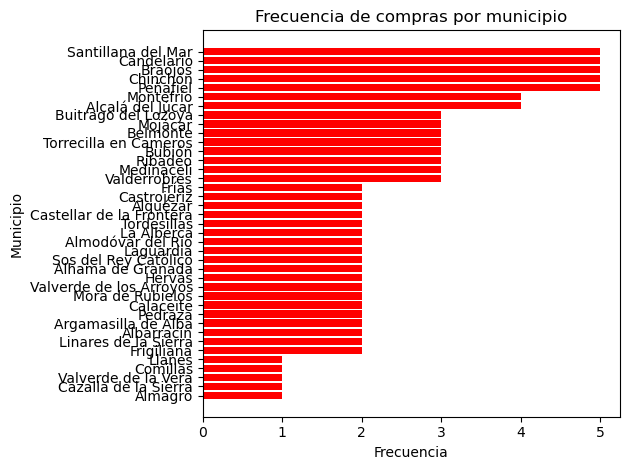

In [ ]:
# 🚨ALERTA SPOILER🚨

# Esto son gráficos que ya veremos más adelante en el MÓDULO 3, pero para que veáis una idea.

# Contar frecuencias y ordenar de mayor a menor
frecuencias = wt_muni['municipio'].value_counts().sort_values(ascending=True)

# Gráfico de barras horizontal
plt.barh(frecuencias.index, frecuencias.values, color='red')
plt.title('Frecuencia de compras por municipio')
plt.xlabel('Frecuencia')
plt.ylabel('Municipio')
plt.tight_layout()
plt.show()

# Este gráfico no tiene practicidad a la hora de interpretarlo.


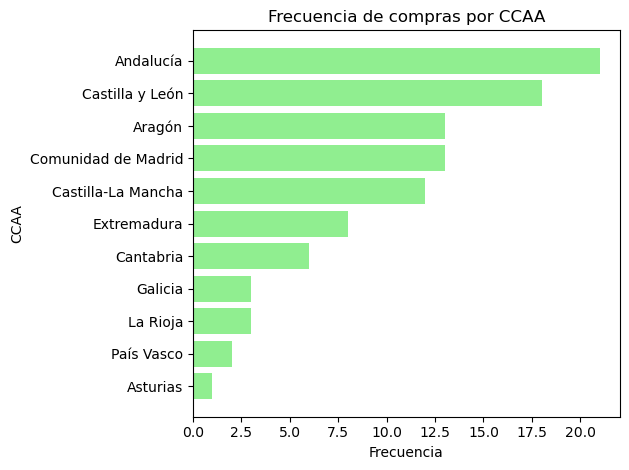

In [ ]:
# Contar frecuencias y ordenar de mayor a menor
frecuencias = wt_muni['CCAA'].value_counts().sort_values(ascending=True)

# Gráfico de barras horizontal
plt.barh(frecuencias.index, frecuencias.values, color='lightgreen')
plt.title('Frecuencia de compras por CCAA')
plt.xlabel('Frecuencia')
plt.ylabel('CCAA')
plt.tight_layout()
plt.show()

# En cambio este, es mas fácil de interpretar

